In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [3]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [4]:
sample_data = data['text'][:1000]

In [5]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [6]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [7]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [ 0.00691114  0.02891056  0.13951676 -0.07554629 -0.01672842 -0.00587485
 -0.03022406  0.18682171 -0.18579091  0.1418712   0.1171379  -0.06604501
  0.13007279 -0.0355632   0.07513113  0.1066955   0.21741797 -0.07057498
 -0.06257941 -0.04091758]
[('476', 0.7964690923690796), ('931', 0.7539815902709961), ('115', 0.6973475813865662), ('614', 0.6932881474494934), ('982', 0.6890275478363037), ('294', 0.6885883212089539), ('507', 0.6773078441619873), ('595', 0.6759260892868042), ('249', 0.6656755805015564), ('823', 0.6648015379905701)]
[-2.4607272  3.8249342  2.1653948  6.015164   2.318826   0.9424559
 -3.3293643 -1.6956753  1.9928012  3.4786787  3.6855567 -1.5904964
 -1.8179145  3.0451899  5.5069118 -4.0988636  8.087154  -3.1713061
 -3.9345975 -8.010667 ]


In [8]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [9]:
list(doc_vectors.values())[0]

array([ 0.00479717, -0.04261665,  0.46347702,  0.2816578 , -0.17709766,
        0.00735513,  0.1098139 ,  0.69039726, -0.5073462 ,  0.10389388,
        0.20892009, -0.09363432,  0.2895759 , -0.16646081,  0.4182672 ,
        0.19964585,  0.57724726, -0.21315493, -0.2991082 , -0.4151949 ],
      dtype=float32)

In [10]:
#perform k-means clustering on embedded documents

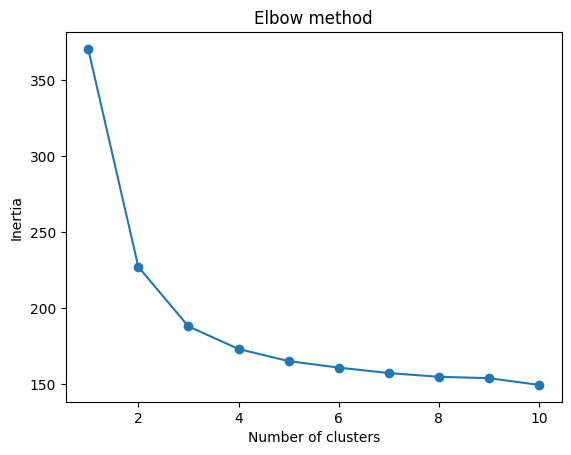

In [11]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
num_clusters = 3

In [13]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [14]:
#find centroids. compute bigram closest to centroid

In [15]:
centroids  = kmeans.cluster_centers_; centroids

array([[-0.00782805,  0.04233985,  0.31565778,  0.16521188, -0.14887459,
        -0.0343027 ,  0.11198044,  0.49753576, -0.4116804 ,  0.07840368,
         0.26312521, -0.10397582,  0.25465793, -0.0366711 ,  0.3874581 ,
         0.17766449,  0.56794273, -0.21200579, -0.3049004 , -0.41073312],
       [-0.00889646,  0.0239082 ,  0.16148119,  0.08566955, -0.08189388,
        -0.00671318,  0.06391246,  0.2627403 , -0.21388147,  0.05003367,
         0.1352037 , -0.05180569,  0.14036586, -0.02482303,  0.20251377,
         0.10089433,  0.30093171, -0.10456611, -0.15962607, -0.22246452],
       [-0.00920042,  0.04306844,  0.45221   ,  0.26800233, -0.19776563,
        -0.06608076,  0.17582859,  0.71640577, -0.6123073 ,  0.12773982,
         0.39417293, -0.17997104,  0.38137887, -0.03981494,  0.56665612,
         0.24268654,  0.81710838, -0.29097547, -0.4308666 , -0.60077584]])

In [16]:
#build vocabulary
vocab = []
for doc in sample_data:
    vocab += word_tokenize(doc.lower())
vocab = list(set(vocab))

In [17]:
#a selection of poliical words 
political_words = [
    "democracy", "republic", "monarchy", "constitution", "senate", "parliament",
    "legislature", "bill", "law", "amendment", "veto", "executive", "judiciary",
    "congress", "cabinet", "prime", "president", "governor", "mayor", "election",
    "ballot", "referendum", "campaign", "lobby", "politician", "party", "coalition",
    "majority", "minority", "opposition", "incumbent", "candidate", "policy", "platform",
    "ideology", "socialism", "capitalism", "communism", "fascism", "nationalism",
    "populism", "liberalism", "conservatism", "progressivism", "federalism", "state",
    "municipality", "autonomy", "centralization", "devolution", "impeachment", "coup",
    "revolution", "sanction", "diplomacy", "treaty", "alliance", "sovereignty", "bureaucracy",
    "civil", "liberty", "freedom", "justice", "equality", "taxation", "welfare", "healthcare",
    "education", "defense", "security", "immigration", "trade", "tariff", "budget", "deficit",
    "debt", "regulation", "deregulation", "policy", "interest", "NGO", "PAC", "grassroots",
    "superpower", "diplomacy", "NATO", "UN", "electoral", "gerrymandering", "filibuster",
    "constituent", "suffrage", "pluralism", "bipartisanship", "caucus", "midterms",
    "progressive", "liberal", "conservative", "leftist", "right-wing", "vote", "redistricting"
]

In [18]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_words)):
    for j in range(i+1,len(political_words)):
        bigrams.append(political_words[i] + " " + political_words[j])

In [19]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [20]:
list(bigram_vecs.values())[0]

array([-0.00234451,  0.03666595, -0.01036598, -0.00319196,  0.01610346,
       -0.03664365,  0.01233414,  0.05656036, -0.01347028, -0.01082337,
       -0.01362908, -0.04619355, -0.03470742, -0.04655853,  0.01659282,
       -0.03662543,  0.01919279,  0.03082169, -0.04012237, -0.05104096],
      dtype=float32)

In [21]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [22]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [23]:
nearest_bigram_to_centroid

[('deficit debt', -0.7597169925207273),
 ('deficit debt', -0.765774136710892),
 ('deficit debt', -0.7563816046652768)]

In [24]:
#use TF-IDF of simply do a frequency count of words occuring in each centroid

In [25]:
labeled_data = zip(sample_data,kmeans.labels_)

In [26]:
#build vocabulary
cluster_vocab = [[] for label in kmeans.labels_]
for doc, label in list(labeled_data):
    print(doc)
    cluster_vocab[label] += word_tokenize(doc.lower())
cluster_vocab = [list(set(vocab)) for vocab in cluster_vocab]

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…
RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…
Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate
Deer in the headlights RT @lizzwinstea

In [27]:
list(labeled_data)

[]